# Data Handling with Python 

## Introduction to Data Handling

**What is Data Handling?**

- The processes involved in collecting, cleaning, transforming, and analyzing data.
- It is the foundation of any data science, machine learning, or analytics task. Data can come in various forms like CSV files, databases, or APIs, and we need efficient methods to manage it.

**Importance of Data Handling**

- Efficient data handling is crucial because the quality of your data influences the quality of your insights or predictions. 
- Properly handled data can lead to more accurate results, whereas poorly managed data might produce misleading outcomes.

**Python Libraries for Data Handling**

The three most widely used libraries for data handling are:

- `numpy`: A fundamental package for numerical computing.
- `pandas`: A data analysis library offering DataFrames and Series for efficient data manipulation.
- `matplotlib`: A plotting library useful for visualizing data.

We will learn about data handling in detail using a sample dataset of artificially created data. This dataset has 1,000 rows, with each row representing a unique sales transaction. The dataset includes sales, costs, and customer and employee identifiers for different cities and product types, with some data intentionally missing to reflect common real-world scenarios. This setup allows for different types of analysis, such as sales trends, profitability and the impact of missing data on the accuracy of the analysis.

`sales_data.csv` contains the following columns:

- Date: Date of the sale.
- City: The city where the sale was made.
- Product: The product sold.
- Sales: Sales amount in dollars.
- Cost: Cost price of the product.
- Customer_ID: Unique ID of the customer.
- Employee_ID: ID of the employee who made the sale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lets start with data handling:

In [2]:
# Load data from a CSV file
sales_data = pd.read_csv('data/sales_data.csv')

Brief and basic information about a dataset can be printed out using the `info()` function of Pandas DataFrames

In [3]:
# Display basic information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1000 non-null   object 
 1   City         1000 non-null   object 
 2   Product      1000 non-null   object 
 3   Sales        951 non-null    float64
 4   Cost         971 non-null    float64
 5   Customer_ID  980 non-null    float64
 6   Employee_ID  1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


## Retrieve specific parts of the DataFrame

It is possible to access and view your DataFrame in a number of ways. This section introduces some of the methods used to retrieve certain parts of the data.

### Access a column from the DataFrame

You can access the data contained in a column of the DataFrame and manipulate it individually or assign it to another variable. When you do this, you return it directly as a Pandas Series (a one-dimensional labelled array).

In [4]:
# Accessing a DataFrame column (as a Series)
sales_series = sales_data['Sales']
sales_series.head()

0    114.56
1    516.23
2    169.77
3    305.25
4    743.84
Name: Sales, dtype: float64

In [5]:
# Accessing multiple columns (as a DataFrame)
subset = sales_data[['Product', 'Sales']]
subset.head()

,Product,Sales
0,Camera,114.56
1,Smartphone,516.23
2,Smartphone,169.77
3,Headphones,305.25
4,Camera,743.84


### Access a row by its index position

One of the first steps when working with new data is to gain a clear understanding of the available data, enabling more effective analysis. This can be achieved by looking at the content of certain parts of the data.

Unlike columns, rows do not have a 'name' by which you can refer to them. Therefore, to access rows you refer to them by their index:

In [6]:
# Accessing a row by its index position
first_row = sales_data.iloc[0]
first_row

Date           2021-04-13
City             New York
Product            Camera
Sales              114.56
Cost                59.57
Customer_ID        1507.0
Employee_ID            27
Name: 0, dtype: object

### Retrieve rows and columns based on specific requirement 

Often time you are looking for data that fulfill certain conditions. With Pandas you can select specific rows and columns, filter based on **conditions**, and **slice** data by index positions. These operations provide a clearer understanding of the dataset, enabling more focused and efficient analysis.

In [7]:
# Slice specific rows and columns
subset = sales_data.loc[2:6, ['Product', 'Sales', 'Employee_ID']]
print("Rows 2 to 6 of the DataFrame are printed, showing values for the specified columns")
subset

Rows 2 to 6 of the DataFrame are printed, showing values for the specified columns


,Product,Sales,Employee_ID
2,Smartphone,169.77,16
3,Headphones,305.25,44
4,Camera,743.84,40
5,Camera,1624.91,26
6,Smartphone,1186.89,16


In [8]:
# Access rows 5 to 14 and columns 2 to 4 (starting from 0)
slice_data = sales_data.iloc[5:15, 2:5]
slice_data

,Product,Sales,Cost
5,Camera,1624.91,1023.76
6,Smartphone,1186.89,948.51
7,Laptop,1074.07,717.18
8,Headphones,657.63,392.18
9,Camera,1870.33,1058.67
10,Smartphone,854.33,517.00
11,Camera,265.48,162.41
12,Headphones,1272.43,662.45
13,Headphones,316.29,193.21
14,Tablet,755.92,483.24


In [9]:
# Filter data where Sales > 500 and City is 'New York'
filtered_data = sales_data[(sales_data['Sales'] > 500) & (sales_data['City'] == 'New York')]
filtered_data

,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
1,2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21
5,2022-12-02,New York,Camera,1624.91,1023.76,4834.0,26
12,2022-04-04,New York,Headphones,1272.43,662.45,NaN,17
17,2021-05-11,New York,Tablet,1037.74,739.52,3589.0,44
21,2022-05-07,New York,Tablet,621.99,401.31,2089.0,45
...,...,...,...,...,...,...,...
980,2021-03-31,New York,Camera,1660.64,1120.14,2133.0,48
987,2022-11-04,New York,Laptop,1724.45,970.26,2505.0,39
988,2022-11-21,New York,Laptop,1776.86,919.65,4874.0,24
989,2021-01-10,New York,Camera,985.99,656.38,4185.0,17


In [10]:
# Filter data for specific cities (New York and Chicago)
city_filtered_data = sales_data[sales_data['City'].isin(['New York', 'Chicago'])]
city_filtered_data

,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
0,2021-04-13,New York,Camera,114.56,59.57,1507.0,27
1,2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21
2,2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16
3,2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44
4,2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40
...,...,...,...,...,...,...,...
991,2022-10-12,Chicago,Laptop,836.87,637.34,3944.0,19
994,2021-06-17,Chicago,Camera,486.60,360.52,4548.0,10
995,2022-10-04,Chicago,Headphones,227.25,150.46,3757.0,9
998,2021-11-15,New York,Camera,1129.35,872.32,1178.0,19


## Modifying an existing Dataset

The goal is to enhance the dataset by adding new columns derived from calculations, modifying existing columns for additional insights, and improving the organisation of the data by setting a meaningful index. These operations enable better analysis and facilitate more intuitive exploration of the data.

As we have seen in previous lectures, adding columns with calculations in Pandas is straightforward.

In [11]:
# Display the first few rows of the DataFrame
sales_data.head()

,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
0,2021-04-13,New York,Camera,114.56,59.57,1507.0,27
1,2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21
2,2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16
3,2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44
4,2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40


In [12]:
# Adding a new column: 'Profit'
sales_data['Profit'] = sales_data['Sales'] - sales_data['Cost']

# Applying a 10% discount on Sales
sales_data['Discounted_Sales'] = sales_data['Sales'] * 0.9
sales_data.head()

,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID,Profit,Discounted_Sales
0,2021-04-13,New York,Camera,114.56,59.57,1507.0,27,54.99,103.104
1,2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21,157.71,464.607
2,2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16,81.11,152.793
3,2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44,118.24,274.725
4,2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40,192.55,669.456


Data can also be modified within columns.

In [13]:
# Modifying an existing column: setting Employee ID to int data format
print(sales_data.dtypes)
sales_data['Employee_ID'] = sales_data['Employee_ID'].astype('int32')
sales_data.dtypes

Date                 object
City                 object
Product              object
Sales               float64
Cost                float64
Customer_ID         float64
Employee_ID           int64
Profit              float64
Discounted_Sales    float64
dtype: object


Date                 object
City                 object
Product              object
Sales               float64
Cost                float64
Customer_ID         float64
Employee_ID           int32
Profit              float64
Discounted_Sales    float64
dtype: object

Changing the index of the DataFrame is usually a routine procedure when working with time series data.

In [14]:
# Changing the index to the Date column
sales_data.set_index('Date', inplace=True)
# Print first few rows to observe changes
sales_data.head()

,City,Product,Sales,Cost,Customer_ID,Employee_ID,Profit,Discounted_Sales
Date,,,,,,,,
2021-04-13,New York,Camera,114.56,59.57,1507.0,27,54.99,103.104
2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21,157.71,464.607
2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16,81.11,152.793
2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44,118.24,274.725
2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40,192.55,669.456


##  Handling missing values

Most datasets have missing values, so you will encounter them when working with the data. A typical approach to dealing with them is as follows:
1. Check for missing values
2. Fill missing values 
3. Drop the missing values from the data (only in special cases)

The first step is to check for missing data in the dataset. This is done in a similar way to dealing with NaN values:

In [15]:
# Check for number of missing values for each column of dataset
sales_data.isnull().sum()

City                 0
Product              0
Sales               49
Cost                29
Customer_ID         20
Employee_ID          0
Profit              76
Discounted_Sales    49
dtype: int64

Missing data points are often filled in for consistency. They may be filled with a certain number, which could be the mean of that data.

In [16]:
# Fill missing Customer_ID values with the mean or max
sales_data['Cost'] = sales_data['Cost'].fillna(sales_data['Cost'].mean())
sales_data.head()

,City,Product,Sales,Cost,Customer_ID,Employee_ID,Profit,Discounted_Sales
Date,,,,,,,,
2021-04-13,New York,Camera,114.56,59.57,1507.0,27,54.99,103.104
2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21,157.71,464.607
2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16,81.11,152.793
2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44,118.24,274.725
2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40,192.55,669.456


To make the data more accurate, more advanced methods can be used to fill in missing values. Interpolation is one such method. In the following, the 'Sales' data is linearly interpolated.

In [17]:
# Fill missing values using linear interpolation
sales_data['Sales'] = sales_data['Sales'].interpolate(method='linear')

# Check if the missing values have been removed
sales_data.isnull().sum()

City                 0
Product              0
Sales                0
Cost                 0
Customer_ID         20
Employee_ID          0
Profit              76
Discounted_Sales    49
dtype: int64

Linear interpolation is fast and efficient, however it does not fit with all physical quantities. Fortunately, there are other more complex interpolation functions that could be used, such as a polynomial function. 

We will be using a polynomial function of the second order to interpolate the missing values of the 'Discounted Sales' column. Before performing the interpolation, we need to ensure that the data has a consistent datetime format as its index, because this is a requirement of the polynomial interpolation method in pandas.

**Note:** The use of `method='polynomial'`requires the installation of the `scipy` library, which is the topic of a future lecture.

In [18]:
#sales_data['Date'] = pd.date_range(start='2023-01-01', periods=len(sales_data), freq='D')
#sales_data.index = pd.to_datetime(sales_data.index)

# Set 'Date' as the index
#sales_data.set_index('Date', inplace=True)

In [19]:
# Perform interpolation
#sales_data['Discounted_Sales'] = sales_data['Discounted_Sales'].interpolate(method='polynomial', order=2)

# Check if the missing values have been removed
#sales_data.isnull().sum()

When a more simple solution is acceptable, the missing values are often filled by the previous or following data point. This is done with the `ffill` method which stands for forward fill or `bfill` which stands for backward fill, respectively.

In [20]:
sales_data['Profit'] = sales_data['Profit'].ffill()  # Forward fill
#sales_data.bfill() # Backward fill

# Check if the missing values have been removed
sales_data.isnull().sum()

City                 0
Product              0
Sales                0
Cost                 0
Customer_ID         20
Employee_ID          0
Profit               0
Discounted_Sales    49
dtype: int64

Removing the data with missing values, is not a recomanded method in general. However there is the possibility to do this in pandas. You should drop rows only if certain critical columns have missing values:

In [21]:
sales_data.dropna(subset=['Sales', 'Customer_ID'], inplace=True)

# Check for missing values
sales_data.isnull().sum()

City                 0
Product              0
Sales                0
Cost                 0
Customer_ID          0
Employee_ID          0
Profit               0
Discounted_Sales    49
dtype: int64

## Optimizing Data Types for Memory Efficiency

The goal of the following code is to optimize the memory usage of the DataFrame by converting columns to more efficient data types. This helps reduce the overall memory consumption, especially when working with large datasets. Optimizing the data types allows you to retain essential information while using less memory, improving the performance of your data processing tasks.

You can easily check the memory usage before and after optimizing the data types by using the `memory_usage()` function in Pandas, which returns the memory usage of each column in the DataFrame.



In [22]:
# Memory usage before optimization
memory_before = sales_data.memory_usage(deep=True).sum()
print(f"Memory usage before optimization: {memory_before / (1024 ** 2):.2f} MB")

Memory usage before optimization: 0.22 MB


In [23]:
# Convert 'Customer_ID' to integer
sales_data['Customer_ID'] = sales_data['Customer_ID'].astype(int)

# Convert 'Sales' to a smaller float type
sales_data['Sales'] = pd.to_numeric(sales_data['Sales'], downcast='float')

# Convert 'Product' to category type
sales_data['Product'] = sales_data['Product'].astype('category')

# Memory usage after optimization
memory_after = sales_data.memory_usage(deep=True).sum()
print(f"Memory usage after optimization: {memory_after / (1024 ** 2):.2f} MB")

Memory usage after optimization: 0.16 MB


In [24]:
# Display the memory saved
memory_saved = memory_before - memory_after
print(f"Memory saved: {memory_saved / (1024 ** 2):.2f} MB")

Memory saved: 0.07 MB


## Performing Advanced Key Operations for Data Analysis

Performing key operations on dataset for data analysis to extract insights from data efficiently. In the following a number of typical operations will be performed in our `sales_data.csv`.


### Group By 

Group the dataset by Product and calculate the total Sales and the mean Cost for each product. This helps in understanding the total revenue and average cost of products sold. The result is a new DataFrame that shows the total sales and average cost for each product.

In [25]:
# Group by Product and calculate total Sales and mean Cost
grouped_data = sales_data.groupby('Product').agg({'Sales': 'sum', 'Cost': 'mean'})
print(grouped_data)

                    Sales        Cost
Product                              
Camera      192219.062500  616.447455
Headphones  233641.828125  672.970091
Laptop      206096.421875  708.476923
Smartphone  186557.015625  647.629665
Tablet      203757.296875  726.843573


C:\Users\ritak\AppData\Local\Temp\ipykernel_4652\3989823352.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = sales_data.groupby('Product').agg({'Sales': 'sum', 'Cost': 'mean'})


### Pivot Tables

Create a pivot table to visualize total sales by Product and City, which will help analyze how each product performs in different cities.

In [26]:
# Create a pivot table showing total sales per Product and City
pivot_table = sales_data.pivot_table(values='Sales', index='Product', columns='City', aggfunc='sum', observed=True)
pivot_table

City,Chicago,Houston,Los Angeles,New York,Phoenix
Product,,,,,
Camera,35845.144531,24259.576172,39015.691406,51100.105469,41998.539062
Headphones,56784.601562,44246.390625,54261.250000,40009.718750,38339.871094
Laptop,36778.750000,46739.839844,36015.058594,36597.109375,49965.656250
Smartphone,40565.019531,30408.369141,31986.300781,45686.718750,37910.605469
Tablet,31759.193359,40666.519531,45773.406250,42057.976562,43500.203125


### Time Series Analysis

Perform advanced time series analysis. This is especially useful for forecasting, trend analysis, and anomaly detection.

In [27]:
# Convert the index to datetime type
sales_data.index = pd.to_datetime(sales_data.index)

# Set 'Date' as the index
#sales_data.set_index('Date', inplace=True)

# Verify the updated dataframe
sales_data.head()

,City,Product,Sales,Cost,Customer_ID,Employee_ID,Profit,Discounted_Sales
Date,,,,,,,,
2021-04-13,New York,Camera,114.559998,59.57,1507,27,54.99,103.104
2022-03-12,New York,Smartphone,516.229980,358.52,2436,21,157.71,464.607
2021-09-28,New York,Smartphone,169.770004,88.66,3575,16,81.11,152.793
2021-04-17,Chicago,Headphones,305.250000,187.01,4426,44,118.24,274.725
2021-03-13,Chicago,Camera,743.840027,551.29,1558,40,192.55,669.456


In [28]:
# Resample data by month and calculate total sales
monthly_sales = sales_data.resample('ME').agg({'Sales': 'sum'})
monthly_sales

,Sales
Date,
2021-01-31,49619.203125
2021-02-28,46180.898438
2021-03-31,36059.140625
2021-04-30,49332.730469
2021-05-31,46745.496094
2021-06-30,39023.343750
2021-07-31,39271.871094
2021-08-31,60394.132812
2021-09-30,39100.003906


### Advanced Aggregation Techniques

You can aggregate and analyze data in more sophisticated ways.

In [29]:
# Group by Product and calculate multiple aggregation metrics
product_summary = sales_data.groupby('Product').agg({
    'Sales': ['sum', 'mean', 'std'],  # Sum, mean, and standard deviation
    'Cost': ['mean', 'min', 'max']   # Mean, min, and max of cost
})
product_summary

C:\Users\ritak\AppData\Local\Temp\ipykernel_4652\2612237100.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_summary = sales_data.groupby('Product').agg({


Sales                                 Cost                
                      sum         mean         std        mean    min      max
Product                                                                       
Camera      192219.062500   951.579529  539.006165  616.447455  56.71  1549.54
Headphones  233641.828125  1038.408081  541.679565  672.970091  69.22  1537.03
Laptop      206096.421875  1102.119873  545.518311  708.476923  59.79  1547.74
Smartphone  186557.015625  1002.994690  537.076233  647.629665  60.37  1529.92
Tablet      203757.296875  1131.984985  526.399170  726.843573  76.63  1580.53

### Correlation and Covariance Analysis 

Understanding relationships between different variables is key in data analysis.

Correlation gives you an understanding of the strength and direction of the relationships between variables. The strong positive correlation between Sales and Cost, and between Sales and Profit, indicates that higher sales will likely lead to higher costs and profits.

In [30]:
# Calculate correlation matrix for numerical columns
correlation_matrix = sales_data[['Sales', 'Cost', 'Profit']].corr()
print('Correlation Matrix')
correlation_matrix

Correlation Matrix


,Sales,Cost,Profit
Sales,1.000000,0.916195,0.852663
Cost,0.916195,1.000000,0.671035
Profit,0.852663,0.671035,1.000000


Covariance gives you an idea of the magnitude of how variables move together. The positive covariances here support the same idea: when Sales increases, both Cost and Profit generally increase as well.

In [31]:
# Calculate covariance
covariance_matrix = sales_data[['Sales', 'Cost', 'Profit']].cov()
print('Covariance Matrix')
covariance_matrix

Covariance Matrix


,Sales,Cost,Profit
Sales,292652.049084,180527.910544,102219.203627
Cost,180527.910544,132666.467633,54163.289113
Profit,102219.203627,54163.289113,49108.667440


## Dealing with Duplicate Entries

**What Are Duplicates?**

Duplicate entries refer to rows that contain identical or near-identical values across all or specific columns of a dataset. Duplicates can distort data aggregation, analysis, and model performance. The occurrence of duplicates is often due to:

- Data entry errors (e.g., manual entry errors).
- Multiple data sources (e.g., combining datasets without proper checks).
- Merging or joining datasets that lead to unintended row repetitions.

**Why Handling Duplicates is Critical?**

- Duplicates can skew aggregate statistics (e.g., total sales, average cost).
- Impact on machine learning models, particularly if the model trains on repeated entries of the same observation.
- In some cases, duplicates are intentional (e.g., repeat transactions from the same customer), and removing them might lead to inaccurate insights.


### Identifying Duplicate Entries

We will first detect exact duplicates across all columns in the dataset. This is useful if an entire transaction has been recorded more than once. This will show us rows that are completely identical.

In [32]:
# Load the dataset
df = pd.read_csv('data/sales_data_with_duplicates.csv')

# Identify exact duplicates (entire row is identical)
duplicates = df[df.duplicated()]
print(f"Exact duplicate entries:")
duplicates

Exact duplicate entries:


,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
1000,2022-08-25,Los Angeles,Headphones,1047.90,636.87,1066.0,5.0
1001,2022-05-26,Los Angeles,Headphones,1526.79,NaN,2873.0,27.0
1002,2022-06-02,Los Angeles,Smartphone,625.01,497.84,1717.0,1.0
1003,2022-07-10,Chicago,Camera,1419.73,1079.74,3125.0,23.0
1004,2022-11-23,New York,Laptop,328.39,237.01,2964.0,24.0
...,...,...,...,...,...,...,...
3025,2022-10-04,NaN,Headphones,227.25,150.46,3757.0,NaN
3026,2022-08-19,NaN,Laptop,1766.97,925.51,2956.0,NaN
3027,2021-11-17,NaN,Camera,839.87,562.51,3368.0,NaN
3028,2021-11-15,NaN,Camera,1129.35,872.32,1178.0,NaN


In [33]:
exact_duplicates_count = df.duplicated().sum()
print(f"Total number of exact duplicate entries: {exact_duplicates_count}")

Total number of exact duplicate entries: 1030


In real-world applications, duplicates may be defined based on certain columns. For example, multiple sales records for the same customer and product on the same date may be considered duplicates.

In [34]:
# Identify duplicates based on specific columns (e.g., Date, Customer_ID, Product)
duplicates_specific = df[df.duplicated(subset=['Date', 'Customer_ID', 'Product'])]
print(f"Duplicates based on Date, Customer_ID, and Product:")
duplicates_specific

Duplicates based on Date, Customer_ID, and Product:


,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
1000,2022-08-25,Los Angeles,Headphones,1047.90,636.87,1066.0,5.0
1001,2022-05-26,Los Angeles,Headphones,1526.79,NaN,2873.0,27.0
1002,2022-06-02,Los Angeles,Smartphone,625.01,497.84,1717.0,1.0
1003,2022-07-10,Chicago,Camera,1419.73,1079.74,3125.0,23.0
1004,2022-11-23,New York,Laptop,328.39,237.01,2964.0,24.0
...,...,...,...,...,...,...,...
3025,2022-10-04,NaN,Headphones,227.25,150.46,3757.0,NaN
3026,2022-08-19,NaN,Laptop,1766.97,925.51,2956.0,NaN
3027,2021-11-17,NaN,Camera,839.87,562.51,3368.0,NaN
3028,2021-11-15,NaN,Camera,1129.35,872.32,1178.0,NaN


In [35]:
# Count the number of duplicates based on specific columns (e.g., Date, Customer_ID, Product)
duplicates_count_specific = df.duplicated(subset=['Date', 'Customer_ID', 'Product']).sum()
print(f"Total number of duplicates based on Date, Customer_ID, and Product: {duplicates_count_specific}")

Total number of duplicates based on Date, Customer_ID, and Product: 2030


### Removing Duplicates

Removing Exact Duplicates (Entire Rows)

In [36]:
# Remove all exact duplicates
df_no_duplicates = df.drop_duplicates()
print(f"Data after removing exact duplicates:")
df_no_duplicates


Data after removing exact duplicates:


,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
0,2021-04-13,New York,Camera,114.56,59.57,1507.0,27.0
1,2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21.0
2,2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16.0
3,2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44.0
4,2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40.0
...,...,...,...,...,...,...,...
2025,2022-10-04,NaN,Headphones,227.25,150.46,3757.0,NaN
2026,2022-08-19,NaN,Laptop,1766.97,925.51,2956.0,NaN
2027,2021-11-17,NaN,Camera,839.87,562.51,3368.0,NaN
2028,2021-11-15,NaN,Camera,1129.35,872.32,1178.0,NaN


Removing Duplicates Based on Specific Columns

In [37]:
# Remove duplicates based on 'Date', 'Customer_ID', and 'Product', keeping the first occurrence
df_no_duplicates_specific = df.drop_duplicates(subset=['Date', 'Customer_ID', 'Product'], keep='first')
print(f"Data after removing duplicates based on selected columns:")
df_no_duplicates_specific


Data after removing duplicates based on selected columns:


,Date,City,Product,Sales,Cost,Customer_ID,Employee_ID
0,2021-04-13,New York,Camera,114.56,59.57,1507.0,27.0
1,2022-03-12,New York,Smartphone,516.23,358.52,2436.0,21.0
2,2021-09-28,New York,Smartphone,169.77,88.66,3575.0,16.0
3,2021-04-17,Chicago,Headphones,305.25,187.01,4426.0,44.0
4,2021-03-13,Chicago,Camera,743.84,551.29,1558.0,40.0
...,...,...,...,...,...,...,...
995,2022-10-04,Chicago,Headphones,227.25,150.46,3757.0,9.0
996,2022-08-19,Los Angeles,Laptop,1766.97,925.51,2956.0,27.0
997,2021-11-17,Los Angeles,Camera,839.87,562.51,3368.0,13.0
998,2021-11-15,New York,Camera,1129.35,872.32,1178.0,19.0


In some cases, you may want to keep duplicates based on custom logic. For instance, if the same customer buys the same product on the same day multiple times, you might want to keep the row with the highest sales amount:

In [38]:
# Sort by Sales and keep the row with the highest sales for each Customer_ID and Product
df_custom_dedup = df.sort_values('Sales', ascending=False).drop_duplicates(subset=['Date', 'Customer_ID', 'Product'], keep='first')
print(f"Custom deduplicated data:\n{df_custom_dedup.head()}")

Custom deduplicated data:
            Date         City     Product    Sales     Cost  Customer_ID  \
234   2021-10-07  Los Angeles  Smartphone  1995.86  1261.23       1467.0   
494   2021-06-09  Los Angeles      Tablet  1990.16  1580.53       2160.0   
165   2022-07-10     New York      Camera  1988.31  1158.36       2159.0   
2571  2022-07-02          NaN      Camera  1987.18  1549.54       4579.0   
1049  2021-11-05          NaN      Camera  1986.35  1122.88       2301.0   

      Employee_ID  
234           7.0  
494          26.0  
165          45.0  
2571          NaN  
1049          NaN  


In [39]:
# Remove all exact duplicates
df_no_duplicates = df.drop_duplicates()
print(f"Data after removing exact duplicates:\n{df_no_duplicates.head()}")

Data after removing exact duplicates:
         Date      City     Product   Sales    Cost  Customer_ID  Employee_ID
0  2021-04-13  New York      Camera  114.56   59.57       1507.0         27.0
1  2022-03-12  New York  Smartphone  516.23  358.52       2436.0         21.0
2  2021-09-28  New York  Smartphone  169.77   88.66       3575.0         16.0
3  2021-04-17   Chicago  Headphones  305.25  187.01       4426.0         44.0
4  2021-03-13   Chicago      Camera  743.84  551.29       1558.0         40.0


## Data Visualization 

Data visualization is key to uncovering patterns and trends within data. By transforming data into visual formats like graphs and charts, complex information becomes more accessible and easier to interpret. This simplification helps analysts and decision-makers quickly identify insights, supporting well-informed choices based on clear visuals.

We began by learning essential data handling techniques, including loading, cleaning, and transforming data for analysis. This involved managing missing values, removing duplicates, and converting data types to ensure data quality and consistency. These steps helped us create a structured, reliable dataset, setting a solid foundation for meaningful analysis. And now we will learn data visualization of our data.

Why Data Handling Precedes Visualization: Handling data before visualization is crucial because it ensures accuracy, quality, and consistency. Cleaning and preparing the dataset helps prevent misleading insights and supports clarity in visualizations by focusing on relevant information. This preparation ultimately enhances the value of visualization, making it a powerful tool for effective data analysis.

### Line Plots 

A line plot is great for visualizing trends or patterns over time. In this example, we will plot the total sales for each day.

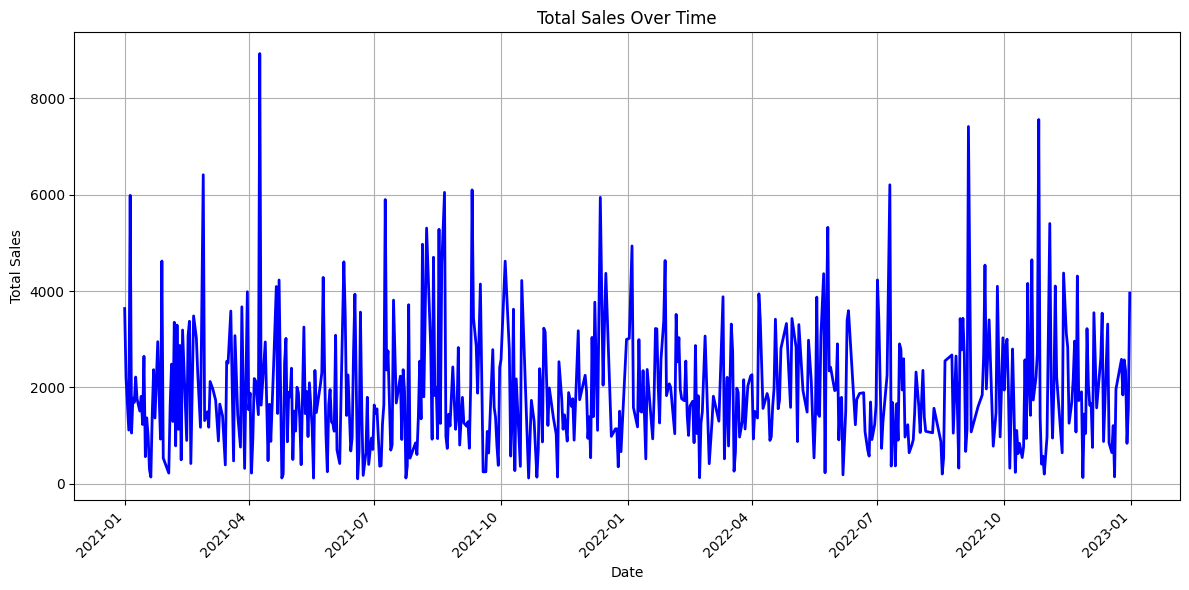

In [40]:
import matplotlib.pyplot as plt

# Plotting total sales over time
plt.figure(figsize=(12, 6))
sales_data.groupby('Date')['Sales'].sum().plot(kind='line', color='b', linewidth=2)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bar Plot 

A bar plot helps compare quantities across different categories. We'll use this to compare the total sales of each product.

C:\Users\ritak\AppData\Local\Temp\ipykernel_4652\3095308718.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_product = sales_data.groupby('Product')['Sales'].sum()


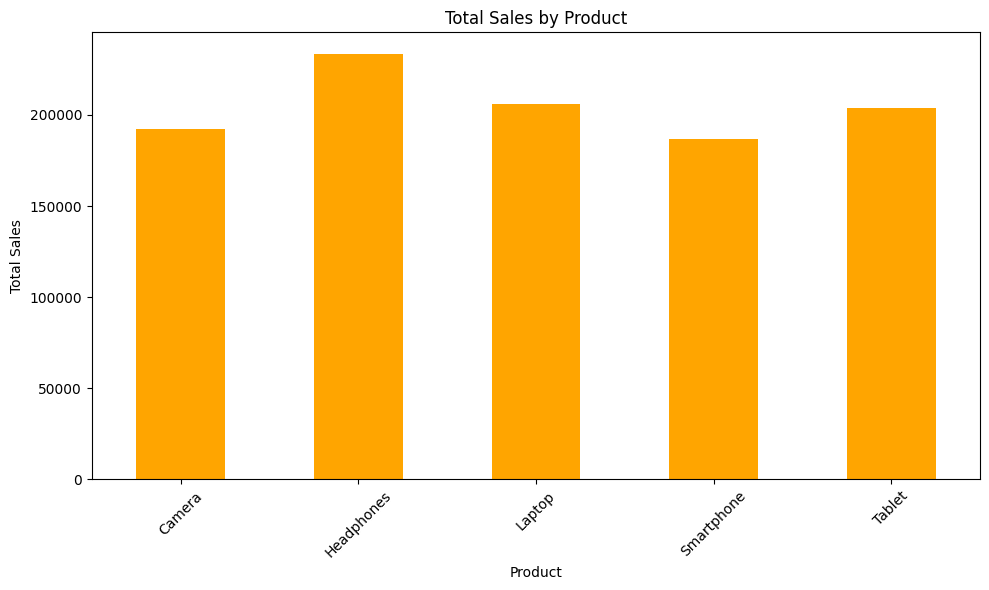

In [41]:
# Plotting sales by product
plt.figure(figsize=(10, 6))
sales_by_product = sales_data.groupby('Product')['Sales'].sum()
sales_by_product.plot(kind='bar', color='orange')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Histogram

A histogram is useful for understanding the distribution of a numerical variable, like sales.

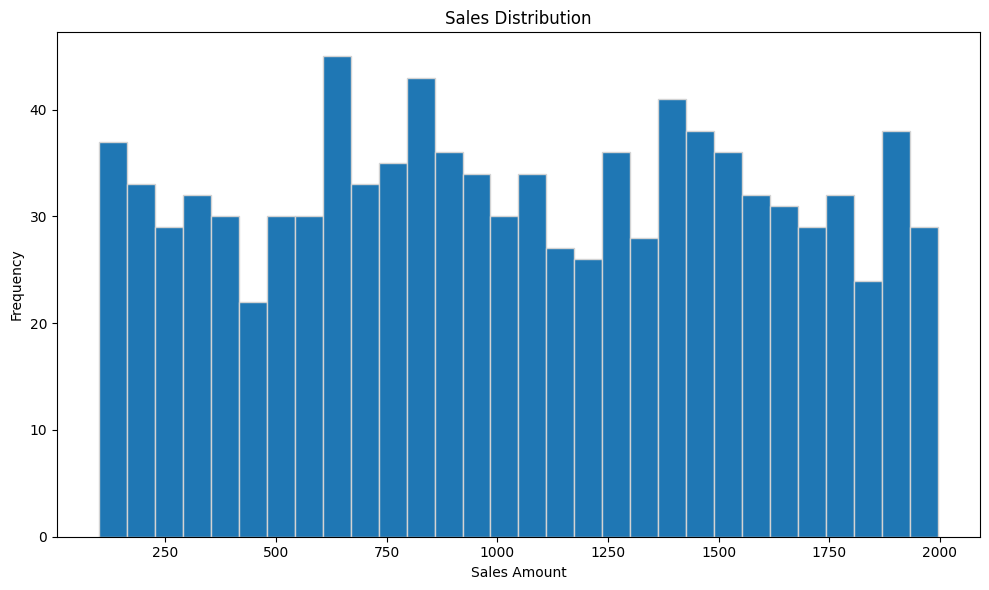

In [42]:
# Plotting the distribution of Sales
plt.figure(figsize=(10, 6))
plt.hist(sales_data['Sales'], bins=30, edgecolor='lightgray')
plt.title('Sales Distribution')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Advanced Plots

Let's explore more advanced plots that give deeper insights into the data.

##### Boxplot 

Boxplots help visualize the spread of data and identify outliers. The boxplot shows the distribution of sales for each product, highlighting the median, interquartile range, and potential outliers.

<Figure size 1200x600 with 0 Axes>

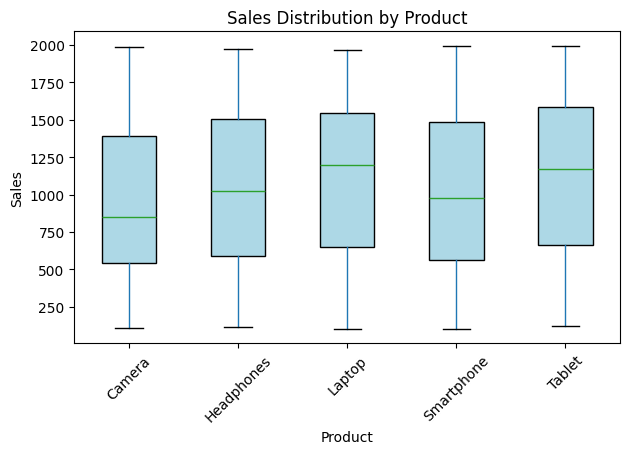

In [43]:
# Boxplot for Sales distribution by Product
plt.figure(figsize=(12, 6))
sales_data.boxplot(column='Sales', by='Product', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Sales Distribution by Product')
plt.suptitle('')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Heatmap

A heatmap helps visualize the correlation matrix between numerical variables. Here, we can check the correlation between Sales, Cost, and Profit.

The heatmap visualizes the correlation between sales, cost, and profit, where warmer colors indicate stronger positive correlations.

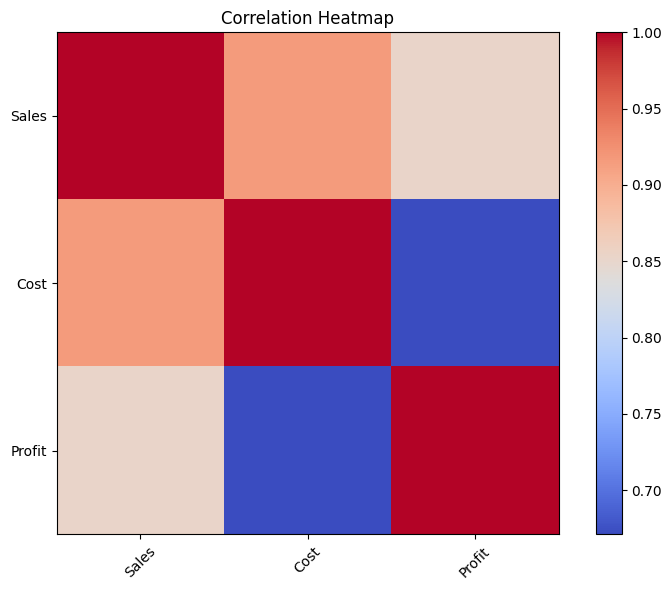

In [44]:
# Calculate the correlation matrix
corr_matrix = sales_data[['Sales', 'Cost', 'Profit']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

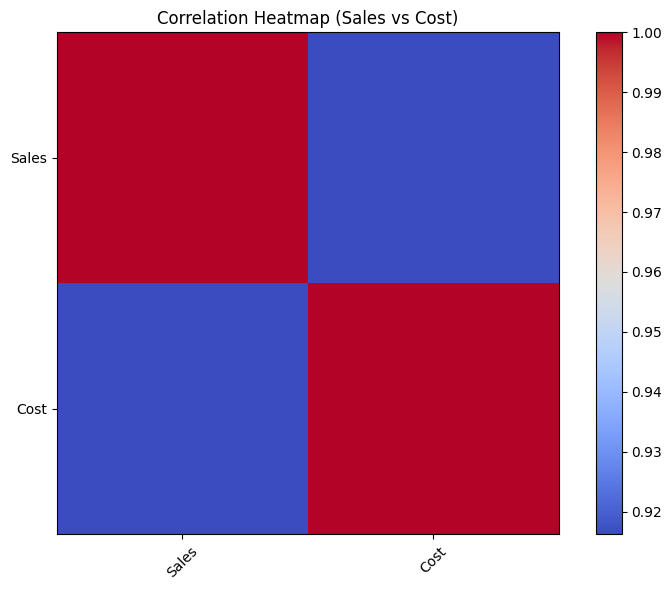

In [45]:
# Calculate the correlation matrix without 'Profit'
corr_matrix = sales_data[['Sales', 'Cost']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap (Sales vs Cost)')
plt.tight_layout()
plt.show()

#### Scatter Plot 
A scatter plot is ideal for visualizing the relationship between two numerical variables.

The scatter plot shows how Sales and Cost are related. Each point represents an individual transaction.

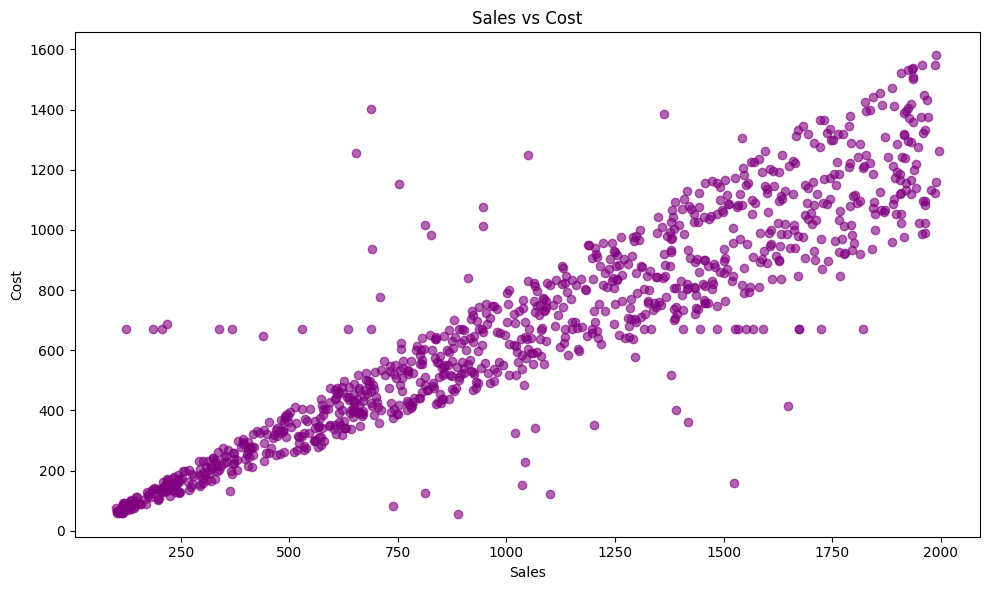

In [46]:
# Scatter plot for Sales vs. Cost
plt.figure(figsize=(10, 6))
plt.scatter(sales_data['Sales'], sales_data['Cost'], color='purple', alpha=0.6)
plt.title('Sales vs Cost')
plt.xlabel('Sales')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

#### Violin Plot 
A violin plot combines aspects of a box plot and a KDE (Kernel Density Estimate) plot, which helps us visualize the distribution of sales across different cities.
The violin plot illustrates the distribution of sales across cities, showing the density of sales values in each city.

<Figure size 1200x600 with 0 Axes>

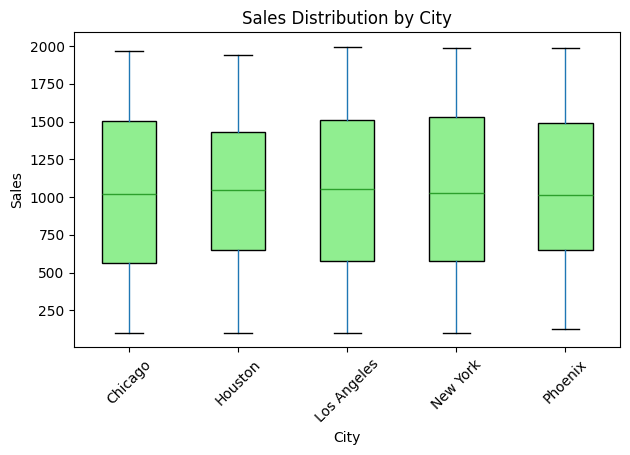

In [47]:
# Violin plot for Sales distribution by City
plt.figure(figsize=(12, 6))
sales_data.boxplot(column='Sales', by='City', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'))
plt.title('Sales Distribution by City')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Plot Customization and Aesthetics

Customizing plots can enhance their readability and appeal.Customizing Plot Styles.

You can change the style of the plot, add gridlines, adjust labels, and more to make the plot more informative.

C:\Users\ritak\AppData\Local\Temp\ipykernel_4652\3146103596.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_data.groupby('Product')['Sales'].sum().plot(kind='bar', color='coral', edgecolor='black')


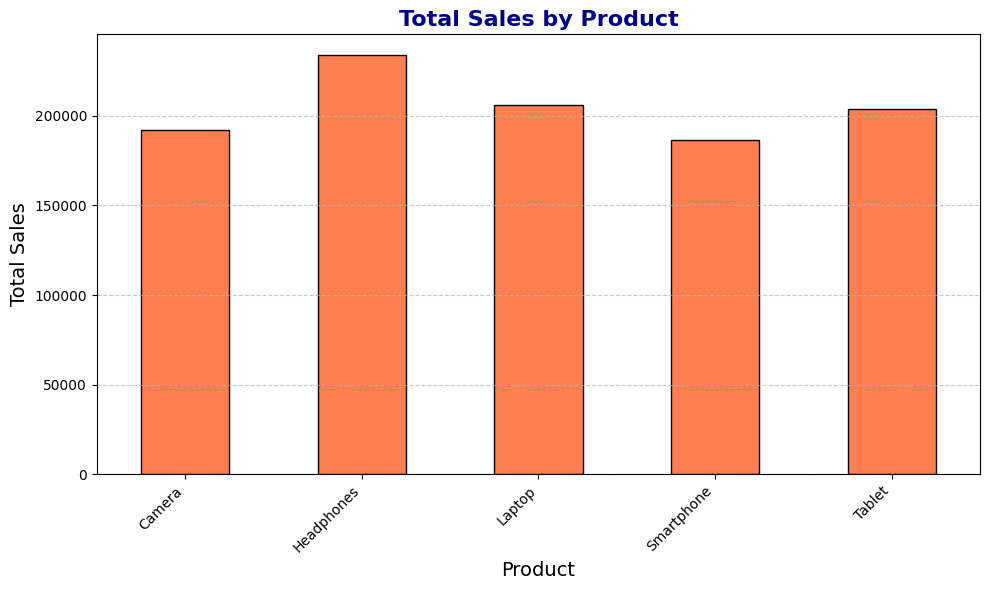

In [48]:
# Customizing the bar plot with colors, gridlines, and labels
plt.figure(figsize=(10, 6))
sales_data.groupby('Product')['Sales'].sum().plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Sales by Product', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Product', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Stacked Bar and Area Plots

Stacked bar plots and area plots allow you to show cumulative values across categories or time periods.

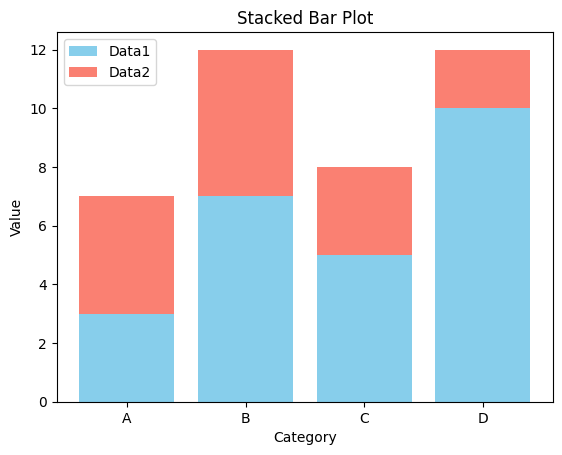

In [49]:
# Sample data
categories = ['A', 'B', 'C', 'D']
data1 = [3, 7, 5, 10]
data2 = [4, 5, 3, 2]

plt.bar(categories, data1, label='Data1', color='skyblue')
plt.bar(categories, data2, bottom=data1, label='Data2', color='salmon')

plt.title('Stacked Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend()
plt.show()

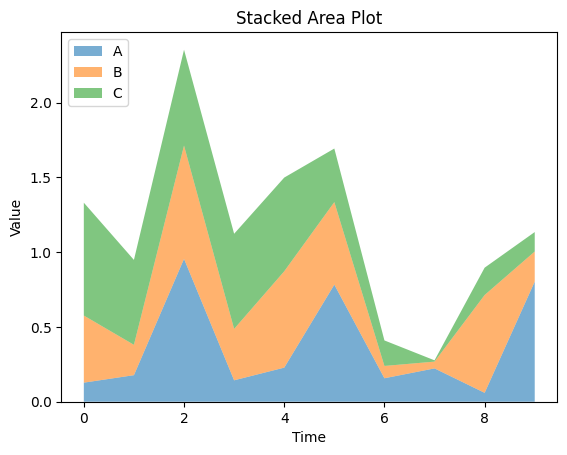

In [50]:
data = np.random.rand(10, 3)

plt.stackplot(range(10), data.T, labels=['A', 'B', 'C'], alpha=0.6)
plt.title('Stacked Area Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

### Time Series Visualization

Time series data can be visualized with customizations like rolling averages, and you can also plot multiple series on the same plot for comparison.

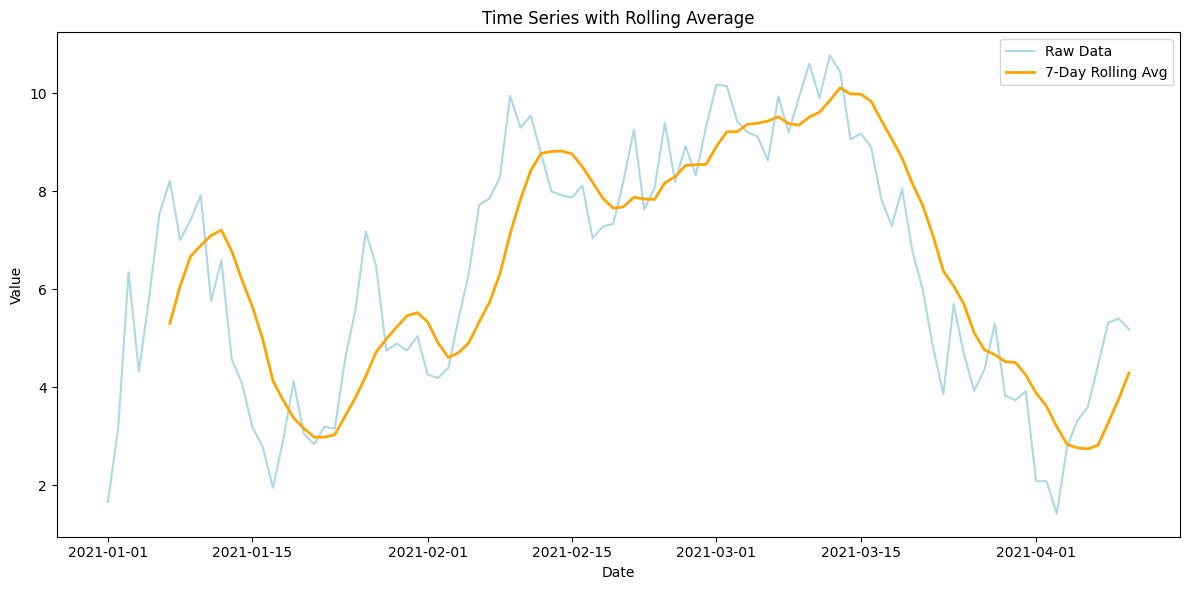

In [51]:
# Generate time series data
dates = pd.date_range('20210101', periods=100)
data = np.random.randn(100).cumsum()

df = pd.DataFrame(data, index=dates, columns=['Value'])

# Plot raw data and rolling average
df['Rolling_Avg'] = df['Value'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Raw Data', color='lightblue')
plt.plot(df.index, df['Rolling_Avg'], label='7-Day Rolling Avg', color='orange', linewidth=2)
plt.title('Time Series with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

### *3D* Plots

For more complex datasets, 3D visualizations can help to visualize relationships between three continuous variables.

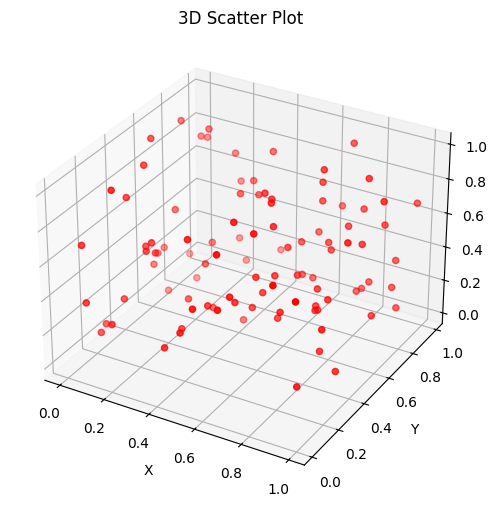

In [52]:
# Sample data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
plt.show()